In [2]:
import torch
import torchvision
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import tensorflow as tf
from keras import backend as K
from imutils import paths

In [2]:
a = np.zeros((2,2),dtype=np.float32)
a[0][0] = 1
a[0][1] = 1
print(K.sum(K.flatten(a)))

tf.Tensor(2.0, shape=(), dtype=float32)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def preprocessing(frame):
  frame = cv2.GaussianBlur(frame,(5,5),0)


  gray = cv2.equalizeHist(frame)

  div = 32
  gray = gray // div * div + div // 2

  return gray

In [ ]:
import tensorflow as tf
input = tf.keras.layers.Input(shape = (224,224,3))
model = tf.keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
input = tf.keras.layers.Input(shape = (3,224,224))
flattened = tf.keras.layers.Flatten()(input)
reshaped = tf.keras.layers.Reshape((3, 224**2))(input)

print(reshaped)

KerasTensor(type_spec=TensorSpec(shape=(None, 3, 50176), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")


In [ ]:
attention_layer = tf.keras.layers.MultiHeadAttention(2,2)(tf.keras.Input(shape=[8, 16]),tf.keras.Input(shape=[8,16]))

print()

In [5]:
!git clone https://github.com/CVIR-Lab/MarsData.git

Cloning into 'MarsData'...
remote: Enumerating objects: 1516, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 1516 (delta 48), reused 14 (delta 1), pack-reused 1363
Receiving objects: 100% (1516/1516), 433.48 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (265/265), done.


In [6]:
!cd drive/MyDrive/dataset/dataset_2 && ls

img  label


In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1DvG5GwFGm1doSxHAYQpCcTkYgCsUiH5K'
output = '20150428_collected_images.tgz'
gdown.download(url, output, quiet=False)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1DvG5GwFGm1doSxHAYQpCcTkYgCsUiH5K 



In [7]:
!cd MarsData/img && unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/331_0331MR0013390000301024E01_DXXX_hf.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_raw.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_rccw.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_rcw.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_sdown.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_sup.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_tleft.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_tup.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_vf.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_warp.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_hf.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_raw.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_rccw.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_rcw.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_sdown.

In [8]:
!cd MarsData/label && unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/331_0331MR0013390000301024E01_DXXX_hf.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_raw.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_rccw.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_rcw.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_sdown.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_sup.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_tleft.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_tup.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_vf.png  
  inflating: train/331_0331MR0013390000301024E01_DXXX_warp.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_hf.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_raw.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_rccw.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_rcw.png  
  inflating: train/332_0332ML0013440000107964E01_DXXX_sdown.

In [9]:
!cd MarsData/img && unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/332_0332ML0013430000107963E01_DXXX_hf.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_raw.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_rccw.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_rcw.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_sdown.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_sup.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_tleft.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_tup.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_vf.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_warp.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_hf.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_raw.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_rccw.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_rcw.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_sdown.png  
  inflating

In [10]:
!cd MarsData/label && unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/332_0332ML0013430000107963E01_DXXX_hf.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_raw.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_rccw.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_rcw.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_sdown.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_sup.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_tleft.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_tup.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_vf.png  
  inflating: test/332_0332ML0013430000107963E01_DXXX_warp.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_hf.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_raw.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_rccw.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_rcw.png  
  inflating: test/336_0336MR0013580000301061E02_DXXX_sdown.png  
  inflating

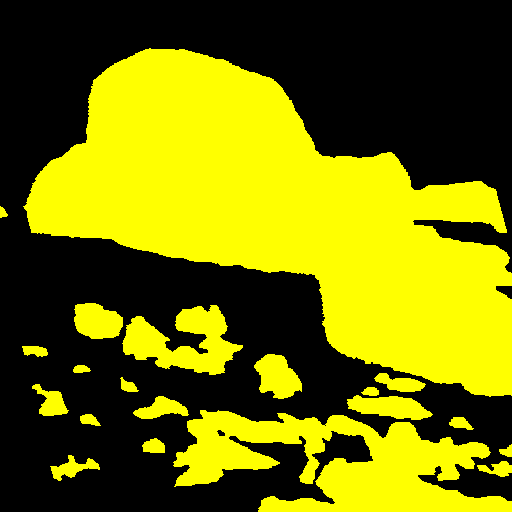

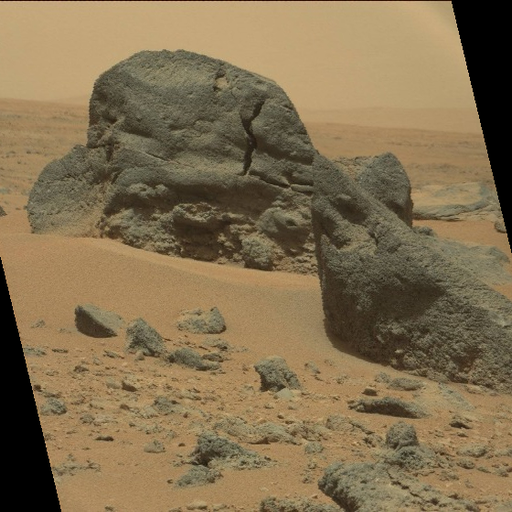

(512, 512, 3)


In [9]:
cv2_imshow(cv2.imread("MarsData/label/train/349_0349MR0014200020301166E01_DXXX_warp.png"))
cv2_imshow(cv2.imread("MarsData/img/train/349_0349MR0014200020301166E01_DXXX_warp.png"))
print(np.asarray(cv2.imread("MarsData/label/train/349_0349MR0014200020301166E01_DXXX_warp.png")).shape)

In [11]:
!cd MarsData/label/train && ls
#dataset_X = list(paths.list_images("drive/MyDrive/dataset/dataset_2/img/"))[:1500]
#dataset_y = list(paths.list_images("drive/MyDrive/dataset/dataset_2/label/"))[:1500]
dataset_X = list(paths.list_images("MarsData/img/train"))
dataset_y = list(paths.list_images("MarsData/label/train"))
dataset_X_test = list(paths.list_images("MarsData/img/test"))
dataset_y_test = list(paths.list_images("MarsData/label/test"))
print(len(dataset_X))
print(len(dataset_y))
#dataset_X_test = list(paths.list_images("drive/MyDrive/dataset/dataset_2/img/"))[1501:1801]
#dataset_y_test = list(paths.list_images("drive/MyDrive/dataset/dataset_2/label/"))[1501:1801]
print(len(dataset_X_test))
print(len(dataset_y_test))

331_0331MR0013390000301024E01_DXXX_hf.png     345_0345MR1401000000E1_DXXX_hf.png
331_0331MR0013390000301024E01_DXXX_raw.png    345_0345MR1401000000E1_DXXX_raw.png
331_0331MR0013390000301024E01_DXXX_rccw.png   345_0345MR1401000000E1_DXXX_rccw.png
331_0331MR0013390000301024E01_DXXX_rcw.png    345_0345MR1401000000E1_DXXX_rcw.png
331_0331MR0013390000301024E01_DXXX_sdown.png  345_0345MR1401000000E1_DXXX_sdown.png
331_0331MR0013390000301024E01_DXXX_sup.png    345_0345MR1401000000E1_DXXX_sup.png
331_0331MR0013390000301024E01_DXXX_tleft.png  345_0345MR1401000000E1_DXXX_tleft.png
331_0331MR0013390000301024E01_DXXX_tup.png    345_0345MR1401000000E1_DXXX_tup.png
331_0331MR0013390000301024E01_DXXX_vf.png     345_0345MR1401000000E1_DXXX_vf.png
331_0331MR0013390000301024E01_DXXX_warp.png   345_0345MR1401000000E1_DXXX_warp.png
332_0332ML0013440000107964E01_DXXX_hf.png     346_0346MR0014080010301146E01_DXXX_hf.png
332_0332ML0013440000107964E01_DXXX_raw.png    346_0346MR0014080010301146E01_DXXX_raw.png

In [12]:
dataset_X_transfer = list(paths.list_images("drive/MyDrive/dataset/dataset_2/img/"))[:1500]
dataset_y_transfer = list(paths.list_images("drive/MyDrive/dataset/dataset_2/label/"))[:1500]

print(len(dataset_X))
print(len(dataset_y))
dataset_X_transfer_test = list(paths.list_images("drive/MyDrive/dataset/dataset_2/img/"))[1501:1801]
dataset_y_transfer_test = list(paths.list_images("drive/MyDrive/dataset/dataset_2/label/"))[1501:1801]
print(len(dataset_X_test))
print(len(dataset_y_test))

100
100
100
100


In [15]:
class DataGenerator(tf.keras.utils.Sequence):

  def __init__(self,batch_size,dataset_X,dataset_y):
    super().__init__()

    self.batch_size = batch_size
    self.dataset_X = dataset_X
    self.dataset_y = dataset_y

  def __len__(self):

    return int(np.floor(len(self.dataset_X)/self.batch_size))

  def __getitem__(self,index):

    indexes_range = self.batch_size*index

    return self.generate_data(indexes_range)

  def generate_data(self,indexes):

    X = []
    y = []

    for index in range(indexes,indexes+self.batch_size):

      X.append(cv2.resize(cv2.imread(self.dataset_X[index]),(512,512)).astype(np.float32))
      y.append(cv2.cvtColor(cv2.resize(cv2.imread(self.dataset_y[index])/255.0,(512,512)).astype(np.float32),cv2.COLOR_BGR2GRAY))

    return np.asarray(X), np.asarray(y)

In [13]:
class InitialBlock(tf.keras.layers.Layer):

  def __init__(self):
    super().__init__()

    self.conv1 = tf.keras.layers.Conv2D(64,(7,7),strides = 2,padding='same')
    self.bn = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.ReLU()


  def call(self,input):
    x = self.conv1(input)
    x = self.bn(x)
    x = self.relu(x)

    return x

class ResNetUsualBlock(tf.keras.layers.Layer):

  def __init__(self,filters):
    super().__init__()

    self.conv1 = tf.keras.layers.Conv2D(filters,(3,3),padding='same')
    self.bn = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.ReLU()

  def call(self,input):

    x = self.conv1(input)
    x = self.bn(x)
    x = self.relu(x)
    x = self.conv1(x)
    x = self.bn(x)
    #print(x)
    x = tf.keras.layers.Add()([x,input])
    x = self.relu(x)

    return x

class ResNetDownsampleResudalBlock(tf.keras.layers.Layer):

  def __init__(self,filters):
    super().__init__()

    self.conv1 = tf.keras.layers.Conv2D(filters,(3,3),strides=2,padding='same')
    self.conv2 = tf.keras.layers.Conv2D(filters,(3,3),padding='same')
    self.bn = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.ReLU()

  def call(self,input):

    x1 = self.conv1(input)
    x1 = self.bn(x1)
    x1 = self.relu(x1)
    x = self.conv1(input)
    x = self.bn(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.bn(x)
    x = self.relu(x)
    out = tf.keras.layers.Add()([x1,x])

    return out

class MSFBlock(tf.keras.layers.Layer):

  def __init__(self,filters,flag):
    super().__init__()

    self.conv1 = tf.keras.layers.Conv2D(filters,(1,1),padding='same')
    self.conv2 = tf.keras.layers.Conv2D(filters,(1,1),padding='same')
    self.conv3 = tf.keras.layers.Conv2D(filters,(1,1),padding='same')
    self.conv4 = tf.keras.layers.Conv2D(filters,(1,1),padding='same')
    self.max_pool = tf.keras.layers.MaxPool2D((3,3),strides=2,padding='same')
    self.upsampling = tf.keras.layers.Conv2DTranspose(filters,(3,3),strides=2,padding='same')
    self.relu = tf.keras.layers.ReLU()
    self.bn = tf.keras.layers.BatchNormalization()
    self.flag = flag

  def call(self,input1,input2,input3):

    x1 = self.conv1(input1)
    x1 = self.relu(x1)
    #print(input2)
    x2 = self.conv2(input2)
    x2 = self.relu(x2)
    #print(input3)
    x3 = self.conv3(input3)
    x3 = self.relu(x3)

    '''
    print(x1)
    print(x2)
    print(x3)
    '''
    if(self.flag == True):
      x1_2 = tf.keras.layers.Add()([self.relu(self.upsampling(x2)),x1])
      x2_2 = tf.keras.layers.Add()([self.relu(self.max_pool(x1)),x2,self.relu(self.upsampling(x3))])
      x3_2 = tf.keras.layers.Add()([self.relu(self.max_pool(x2)),x3])
    else:
      x1_2 = tf.keras.layers.Add()([self.relu(self.upsampling(x2)),x1])
      x2_2 = tf.keras.layers.Add()([self.relu(self.max_pool(x1)),x2,x3])
      x3_2 = tf.keras.layers.Add()([x2,x3])


    x1_2 = self.relu(x1_2)
    x2_2 = self.relu(x2_2)
    x2_3 = self.relu(x3_2)

    if(self.flag == True):
      x_out = tf.keras.layers.Concatenate()([self.relu(self.max_pool(x1_2)),x2_2,self.relu(self.upsampling(x2_3))])
    else:
      x_out = tf.keras.layers.Concatenate()([self.relu(self.max_pool(x1_2)),x2_2,x2_3])

    x_out = self.conv4(x_out)
    x_out = self.relu(x_out)

    return x_out

class Decode(tf.keras.layers.Layer):

  def __init__(self,filters):
    super().__init__()
    self.conv1 = tf.keras.layers.Conv2D(filters/4,(1,1),padding='same')
    self.bn = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.ReLU()
    self.conv2 = tf.keras.layers.Conv2D(filters,(3,3),padding='same')
    self.conv3 = tf.keras.layers.Conv2D(filters/4,(1,1),padding='same')
    self.conv4 = tf.keras.layers.Conv2D(filters,(1,1),padding='same')
    self.upsample = tf.keras.layers.Conv2DTranspose(filters,(3,3),strides=(2,2),padding='same')

  def call(self,input1,input2):
    input1_1 = self.conv1(input1)
    input1_1 = self.relu(input1_1)
    input1_1 = self.conv2(input1_1)
    input1_1 = self.relu(input1_1)

    input2_2 = self.conv3(input2)
    input2_2 = self.relu(input2_2)
    input2_2 = self.upsample(input2_2)
    input2_2 = self.relu(input2_2)

    concatenation = tf.keras.layers.Concatenate()([input1_1,input2_2])
    out = self.conv4(concatenation)
    out = self.relu(out)

    return out

class Tb3(tf.keras.layers.Layer):

  def __init__(self,width,height,channels):
    super().__init__()

    self.width = width
    self.height = height
    self.channels = channels

    self.conv = tf.keras.layers.Conv2D(256,(1,1),(1,1),padding='same')
    self.relu = tf.keras.layers.ReLU()
    self.mha = tf.keras.layers.MultiHeadAttention(2,64)
    self.average_pooling = tf.keras.layers.AveragePooling2D(pool_size=(3,3),strides=(2,2),padding='same')

  def call(self,input):

    x = self.conv(input)
    #print(x.shape)
    x = self.relu(x)
    x = self.average_pooling(x)
    #print(x.shape)
    x = tf.keras.layers.Flatten()(x)
    #print(x.shape)
    x = tf.keras.layers.Reshape((self.height*self.width,self.channels))(x)

    '''
    for _ in range(4):
      x = self.HeadsBlock(x)
    '''

    x = self.mha(x,x)

    x = tf.keras.layers.Reshape((self.height,self.width,self.channels))(x)

    return x

  def HeadsBlock(self,x):

    x = self.mha(x,x)

    return x


In [13]:
def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
def RockSeg():
  input = tf.keras.layers.Input(shape=(512,512,3))

  init_x = InitialBlock()(input)
  #print(init_x)

  max_pool_x = tf.keras.layers.MaxPool2D((3,3),padding='same',strides=2)(init_x)
  #print(max_pool_x)
  x = ResNetUsualBlock(64)(max_pool_x)
  x = ResNetUsualBlock(64)(x)
  b1 = ResNetUsualBlock(64)(x)

  x = ResNetDownsampleResudalBlock(128)(b1)
  x = ResNetUsualBlock(128)(x)
  x = ResNetUsualBlock(128)(x)
  b2 = ResNetUsualBlock(128)(x)

  #print(b2.shape)


  x = ResNetDownsampleResudalBlock(256)(b2)
  x = ResNetUsualBlock(256)(x)
  x = ResNetUsualBlock(256)(x)
  b3 = ResNetUsualBlock(256)(x)


  #b3 = Tb3(32,32,256)(b2)


  mfs1 = MSFBlock(64,False)(init_x,max_pool_x,b1)

  mfs2 = MSFBlock(128,True)(b1,b2,b3)

  decode1 = Decode(128)(mfs2,b3)
  decode2 = Decode(64)(mfs1,decode1)

  print(decode2)
  print(mfs1)
  print(mfs2)
  decode3 = tf.keras.layers.Conv2DTranspose(64,(7,7),(4,4),padding='same',activation='relu')(decode2)
  print(decode3)
  output = tf.keras.layers.Conv2D(1,(1,1),1,padding='same',activation='sigmoid')(decode3)

  loss = tf.keras.losses.BinaryCrossentropy()

  optimizer = tf.keras.optimizers.Adam(
      learning_rate=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
          boundaries=[5000], values=[1e-4, 5e-5]
      )
  )

  model = tf.keras.Model(inputs=input,outputs=output)

  model.compile(optimizer=optimizer, loss=dice_loss, metrics=[f1_m,'accuracy'])
  return model
  #print(b3)


In [18]:
model = RockSeg()
train_generator = DataGenerator(8,dataset_X,dataset_y)
test_generator = DataGenerator(8,dataset_X_test,dataset_y_test)
model.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator)

KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 64), dtype=tf.float32, name=None), name='decode_3/re_lu_31/Relu_4:0', description="created by layer 'decode_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 64), dtype=tf.float32, name=None), name='msf_block_2/re_lu_28/Relu_9:0', description="created by layer 'msf_block_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 128), dtype=tf.float32, name=None), name='msf_block_3/re_lu_29/Relu_12:0', description="created by layer 'msf_block_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 64), dtype=tf.float32, name=None), name='conv2d_transpose_9/Relu:0', description="created by layer 'conv2d_transpose_9'")


<ipython-input-18-0b117dd57f07>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator)


Epoch 1/100
12/12 [==============================] - ETA: 0s - loss: 0.6518 - f1_m: 0.0356 - accuracy: 0.1857


KeyboardInterrupt



In [ ]:
for layer in model.layers:
  layer.trainable = False

model.layers[len(model.layers) - 1].trainable = True

for layer in model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


In [14]:
train_generator = DataGenerator(8,dataset_X_transfer,dataset_y_transfer)
test_generator = DataGenerator(8,dataset_X_transfer_test,dataset_y_transfer_test)
model.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator)

NameError: name 'DataGenerator' is not defined

In [ ]:
for layer in model.layers:
  print(layer.trainable)

1/1 [==============================] - 0s 24ms/step
(512, 512)


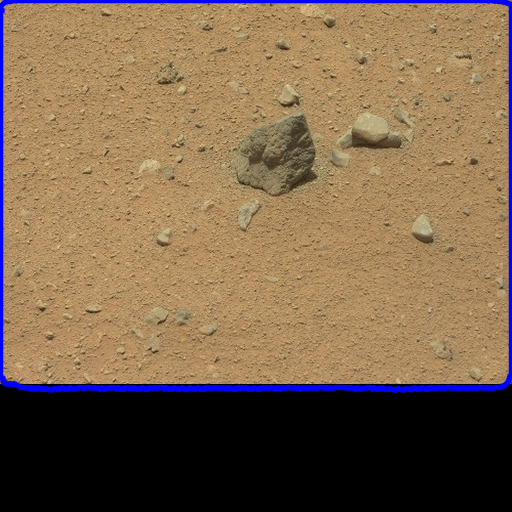

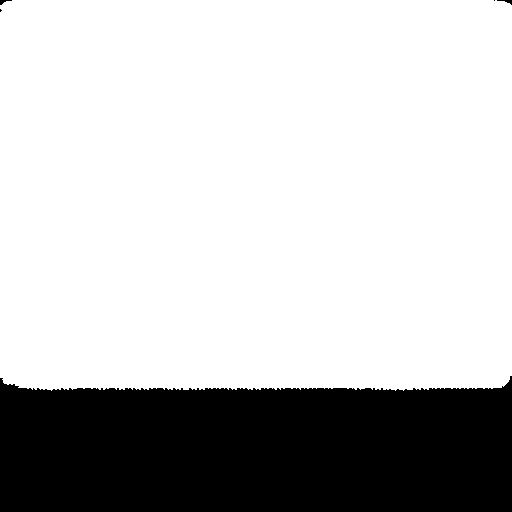

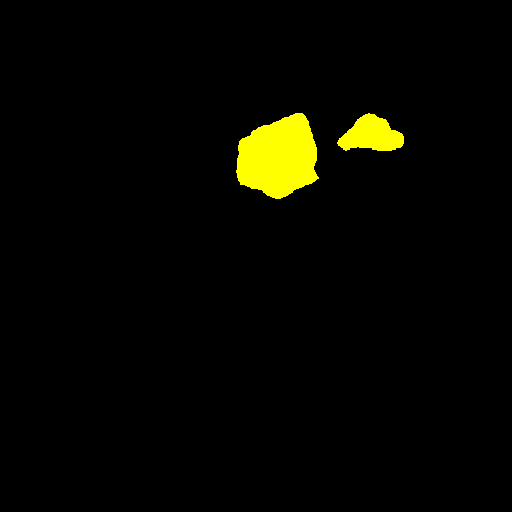

In [ ]:
sample = cv2.imread("MarsData/img/test/368_0368ML0014930000108677E01_DXXX_tup.png")
prediction = model.predict(sample.reshape(1,512,512,3).astype(np.float32))
#cv2_imshow(prediction*255.0)
ret,filtered = cv2.threshold(prediction.reshape(512,512,1)*255.0,240,255,cv2.THRESH_BINARY)
print(filtered.shape)
contours, hierarchy = cv2.findContours(filtered.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(sample, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1)
cv2_imshow(sample)

cv2_imshow(filtered)
cv2_imshow(cv2.imread("MarsData/label/test/368_0368ML0014930000108677E01_DXXX_tup.png")*255.0)


In [16]:
%env SM_FRAMEWORK=tf.keras
!pip install segmentation-models
from segmentation_models import Unet, FPN
from segmentation_models import  get_preprocessing # this line has an error in the docs

from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from segmentation_models.losses import dice_loss
#from segmentation_models.metrics import dice_score

from segmentation_models.utils import set_trainable

BACKBONE = 'mobilenetv2'
preprocess_input = get_preprocessing(BACKBONE)

# Note that the model takes 3-channel images as input
model1 = Unet(BACKBONE, input_shape=(512,512, 3),
             #freeze_encoder=False,
             classes=1,
             encoder_weights='imagenet',
             activation='sigmoid')
model1.input.shape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.1 MB/s eta 0:00:00
Segmentation Models: using `tf.keras` framework.


/usr/local/lib/python3.10/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9406464/9406464 [==============================] - 0s 0us/step


TensorShape([None, 512, 512, 3])

In [17]:

train_generator = DataGenerator(8,dataset_X,dataset_y)
test_generator = DataGenerator(8,dataset_X_test,dataset_y_test)

adam = tf.keras.optimizers.legacy.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model1.compile(optimizer=adam, loss=dice_loss, metrics=[f1_m,'accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
model1.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator)

<ipython-input-18-27ac6b17771f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator)


Epoch 1/100
12/12 [==============================] - 44s 709ms/step - loss: 0.6492 - f1_m: 0.2660 - accuracy: 0.5845 - val_loss: 0.7049 - val_f1_m: 0.2670 - val_accuracy: 0.5354
Epoch 2/100
12/12 [==============================] - 7s 633ms/step - loss: 0.5481 - f1_m: 0.5078 - accuracy: 0.6117 - val_loss: 0.6806 - val_f1_m: 0.3367 - val_accuracy: 0.3885
Epoch 3/100
12/12 [==============================] - 7s 592ms/step - loss: 0.4614 - f1_m: 0.7013 - accuracy: 0.6305 - val_loss: 0.6478 - val_f1_m: 0.4038 - val_accuracy: 0.3749
Epoch 4/100
12/12 [==============================] - 7s 604ms/step - loss: 0.3913 - f1_m: 0.8242 - accuracy: 0.6492 - val_loss: 0.6166 - val_f1_m: 0.4747 - val_accuracy: 0.5563
Epoch 5/100
12/12 [==============================] - 7s 594ms/step - loss: 0.3416 - f1_m: 0.8753 - accuracy: 0.6595 - val_loss: 0.6222 - val_f1_m: 0.4511 - val_accuracy: 0.7490
Epoch 6/100
12/12 [==============================] - 7s 610ms/step - loss: 0.3049 - f1_m: 0.9019 - accuracy: 0.669

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-27ac6b17771f>", line 1, in <cell line: 1>
    model1.fit_generator(generator=train_generator,epochs=100,validation_data=test_generator)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2913, in fit_generator
    return self.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorph

TypeError: object of type 'NoneType' has no len()

In [20]:
for layer in model1.layers:
  layer.trainable = False

model1.layers[len(model1.layers) - 5].trainable = True
model1.layers[len(model1.layers) - 4].trainable = True
model1.layers[len(model1.layers) - 3].trainable = True
model1.layers[len(model1.layers) - 2].trainable = True
model1.layers[len(model1.layers) - 1].trainable = True

for layer in model1.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [21]:

train_transfer_generator = DataGenerator(8,dataset_X_transfer,dataset_y_transfer)
test_transfer_generator = DataGenerator(8,dataset_X_transfer_test,dataset_y_transfer_test)

adam = tf.keras.optimizers.legacy.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model1.compile(optimizer=adam, loss=dice_loss, metrics=[f1_m,'accuracy'])


In [ ]:
model1.fit_generator(generator=train_transfer_generator,epochs=100,validation_data=test_transfer_generator)

<ipython-input-22-ae90ea71274c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(generator=train_transfer_generator,epochs=100,validation_data=test_transfer_generator)


Epoch 1/100
 42/187 [=====>........................] - ETA: 34:32 - loss: 0.7536 - f1_m: 0.2446 - accuracy: 0.3274